<a href="https://colab.research.google.com/github/raninataliapurba10/Portofolio/blob/main/Regression_and_Inferential_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
#Get Dataset
df_sal = pd.read_csv('https://raw.githubusercontent.com/brainspopper/dataset/main/Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
#Describe Data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/tmp/ipython-input-139851251.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


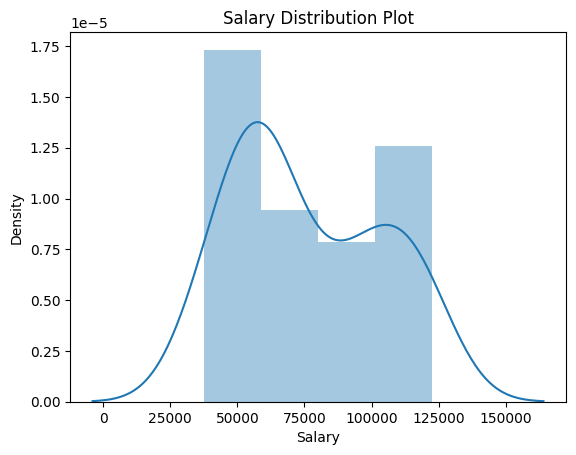

In [ ]:
#Data Distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

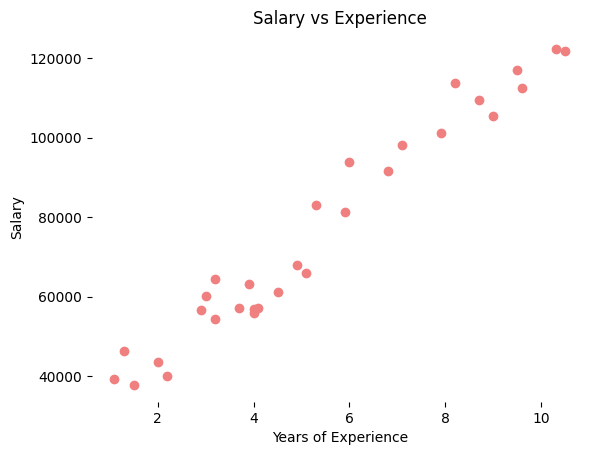

In [ ]:
#Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

Sekarang terlihat jelas, data yang dimiliki bervariasi secara linear. Artinya, seseorang menerima gaji lebih banyak seiring bertambahnya pengalaman.

**Step 4: Membagi dataset menjadi dependent/independent variables**

In [ ]:
#Splitting Variables
X = df_sal.iloc[:, :-1].values
y = df_sal.iloc[:, 1].values

**Step 5: Membuat Model**

In [ ]:
#Regressor Model
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
#Regressor Coefficient and Intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [9449.96232146]
Intercept: 25792.200198668696


Persamaan yang didapat = 25792.200198668696 + 9449.96232146(X)

**Step 6: Mengevaluasi Model**

In [ ]:
#Calculate R-Squared of Regression Model
r_squared = regressor.score(X, y)
print(f'R-Squared: {r_squared}')

R-Squared: 0.9569566641435086


Mean Square Error

In [ ]:
y_pred = regressor.predict(X)

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(5592.043608760661)

**Step 7: Pengecekan Pemenuhan Syarat**

Homoskedastisitas
Goldfeld Quandt Test
1. H0 -> Null Hypothesis: Error terms are homoscedastic
2. H1 -> Alt. Hypothesis: Error terms are heteroscedastic

In [31]:
residuals = y - y_pred

In [32]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', np.float64(1.080730670761193)),
 ('p-value', np.float64(0.44327931035663354))]

Normality Residual

/tmp/ipython-input-1923363406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals, kde = True)


Text(0.5, 1.0, 'Normality of Error Terms/Residuals')

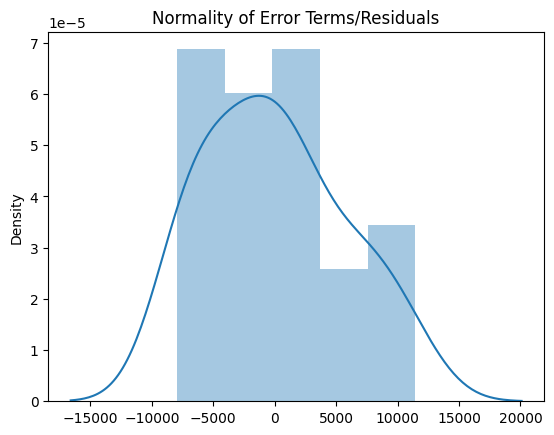

In [34]:
p = sns.distplot(residuals, kde = True)
plt.title('Normality of Error Terms/Residuals')

Independensi Residual (No Autocorrelation)

Ljungbox Test\
H0 -> Null Hypothesis: Autocorrelation is absent.\
H1 -> Alt. Hypothesis: Autocorrelation is present.

In [36]:
import statsmodels.stats.diagnostic as sm_diagnostic
sm_diagnostic.acorr_ljungbox(residuals, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,7.190889,0.206826
